In [1]:
import os
import os.path
import pandas as pd
import numpy as np
import gurobipy as gp
from sklearn.metrics import mean_squared_error
import time

**Setting the Time Limit**

In [2]:
gurobi_time_limit = 36
env = gp.Env()
env.setParam('TimeLimit',gurobi_time_limit)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-08-20
Set parameter TimeLimit to value 36


**Reading the Training_data.csv file**

In [3]:
df=pd.read_csv('training_data.csv')

In [4]:
df

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,8.536145,-1.535413,0.718888,-2.099149,-0.442842,-0.598978,-1.642574,0.207755,0.760642,0.575874,...,0.361866,1.793098,-0.631287,-0.061751,0.511049,0.488754,-0.612772,-0.471045,-1.139781,-0.260773
1,4.808344,-1.734609,0.551981,-2.147673,-1.552944,1.514910,-1.143972,0.737594,1.321243,-0.261684,...,-0.677985,-0.165679,0.065405,0.137162,1.258197,-0.120834,-1.564834,-0.242565,-0.001827,1.187453
2,-1.530427,0.097257,0.107634,-0.194222,0.335454,-0.408199,0.133265,0.706179,0.394971,-0.437116,...,1.108801,0.333791,0.282055,-1.086294,-0.115354,0.257857,-0.088838,-0.751231,1.450609,0.290593
3,-0.428243,-0.067702,0.557836,0.700848,-1.121376,1.722274,0.613525,0.700909,-0.417976,1.069749,...,0.692511,-0.350990,0.624558,0.434520,-0.367409,-1.144681,-0.136524,-0.557214,0.416303,0.484495
4,0.566694,0.488729,0.211483,0.568389,0.646837,0.163868,-0.002152,0.125137,0.493571,1.705451,...,-0.000605,1.075280,0.182281,-1.138458,0.106092,0.544640,-0.383487,-0.425773,2.667647,-0.050748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,7.296352,0.210132,-0.193059,2.033908,-0.832887,0.049040,-0.197864,-1.885529,-2.526842,-0.826903,...,0.555085,-2.099135,-0.411719,1.053645,-0.172623,-1.207709,0.748914,-1.343144,-0.696000,0.525172
246,6.385276,-0.039047,-0.021366,1.040784,-3.435317,-0.419417,0.293139,-0.165674,-0.357788,-0.943576,...,-0.564113,-1.721975,-0.556074,0.028959,0.594509,-1.010988,-0.205257,-0.148502,-0.656065,0.140523
247,7.835373,0.091237,0.473698,0.051832,0.721924,0.337938,1.322324,-0.605442,0.428120,0.003276,...,0.348330,0.099530,0.019925,1.121458,1.901447,-0.431072,-0.124469,-0.084185,-0.200143,0.840786
248,4.788263,-1.407003,0.510886,-2.077584,-0.438144,2.225628,0.165129,-1.335051,1.348180,-0.031812,...,-1.076265,1.303594,-1.458794,1.172178,0.451014,0.572106,-3.660368,-0.052251,0.543762,0.274006


In [5]:
y=df['y']
x=df.iloc[:, 1:]
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,-1.535413,0.718888,-2.099149,-0.442842,-0.598978,-1.642574,0.207755,0.760642,0.575874,0.865598,...,0.361866,1.793098,-0.631287,-0.061751,0.511049,0.488754,-0.612772,-0.471045,-1.139781,-0.260773
1,-1.734609,0.551981,-2.147673,-1.552944,1.514910,-1.143972,0.737594,1.321243,-0.261684,1.838930,...,-0.677985,-0.165679,0.065405,0.137162,1.258197,-0.120834,-1.564834,-0.242565,-0.001827,1.187453
2,0.097257,0.107634,-0.194222,0.335454,-0.408199,0.133265,0.706179,0.394971,-0.437116,-1.105334,...,1.108801,0.333791,0.282055,-1.086294,-0.115354,0.257857,-0.088838,-0.751231,1.450609,0.290593
3,-0.067702,0.557836,0.700848,-1.121376,1.722274,0.613525,0.700909,-0.417976,1.069749,-0.314318,...,0.692511,-0.350990,0.624558,0.434520,-0.367409,-1.144681,-0.136524,-0.557214,0.416303,0.484495
4,0.488729,0.211483,0.568389,0.646837,0.163868,-0.002152,0.125137,0.493571,1.705451,0.431451,...,-0.000605,1.075280,0.182281,-1.138458,0.106092,0.544640,-0.383487,-0.425773,2.667647,-0.050748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.210132,-0.193059,2.033908,-0.832887,0.049040,-0.197864,-1.885529,-2.526842,-0.826903,-0.582301,...,0.555085,-2.099135,-0.411719,1.053645,-0.172623,-1.207709,0.748914,-1.343144,-0.696000,0.525172
246,-0.039047,-0.021366,1.040784,-3.435317,-0.419417,0.293139,-0.165674,-0.357788,-0.943576,0.086800,...,-0.564113,-1.721975,-0.556074,0.028959,0.594509,-1.010988,-0.205257,-0.148502,-0.656065,0.140523
247,0.091237,0.473698,0.051832,0.721924,0.337938,1.322324,-0.605442,0.428120,0.003276,1.374990,...,0.348330,0.099530,0.019925,1.121458,1.901447,-0.431072,-0.124469,-0.084185,-0.200143,0.840786
248,-1.407003,0.510886,-2.077584,-0.438144,2.225628,0.165129,-1.335051,1.348180,-0.031812,-0.383660,...,-1.076265,1.303594,-1.458794,1.172178,0.451014,0.572106,-3.660368,-0.052251,0.543762,0.274006


In [6]:
ndata = x.shape[0]
nx = x.shape[1]
batches = 10
dat_per_bat = ndata//batches
M=10

**Calculate the MSE for different k-fold**

In [7]:
start_time1 = time.time()
if not os.path.isfile('results.csv'):
        shuf = np.random.choice(range(ndata),size=ndata,replace=False)
        k=[*range(5,nx+1,5)]
        results_df = pd.DataFrame(columns=['k', 'MSE'])
        for l in range(len(k)):
                k_mse=0
                for bat in range(batches):
                #Divide in batches
                        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
                
                # Testing Set
                        X_test = x.iloc[this_bat,:]
                        y_test = y.iloc[this_bat]

                # Training set
                        train_indices = [i for i in range(ndata) if i not in this_bat]
                        X_train = x.iloc[train_indices,:]
                        y_train = y.iloc[train_indices]
                        n_train=X_train.shape[0]

                # Fit the linear regression model on the training data
                        qp = gp.Model(env=env)
                        w = qp.addMVar(nx+1,lb=-gp.GRB.INFINITY)
                        c = qp.addMVar(nx+1,vtype='B')
                        qp.setObjective(gp.quicksum((((w[0]+gp.quicksum(X_train.iloc[j,i]*w[i+1] for i in range(nx)))-y_train.iloc[j])
                                                     *((w[0]+gp.quicksum(X_train.iloc[j,i]*w[i+1] for i in range(nx)))-y_train.iloc[j])) for j in range(n_train)))
                        con1=qp.addConstrs(w[i+1]>=-c[i+1]*M for i in range(nx))
                        con2=qp.addConstrs(w[i+1]<=c[i+1]*M for i in range(nx))
                        con3=qp.addConstr(gp.quicksum(c[i+1] for i in range(nx))==k[l])
                        qp.Params.OutputFlag = 0
                        qp.optimize()

                # Predict on the test data
                        y_pred=[0]*len(y_test)
                        for ki in range(len(y_test)):
                                y_pred[ki]=w.x[0]
                                for j in range(nx):
                                        y_pred[ki]+=w.x[j+1]*X_test.iloc[ki,j]

                # Calculate the mean squared error for this fold
                        mse = mean_squared_error(y_test, y_pred)

                        k_mse+=mse
                average_mse=k_mse/batches
                new_data = pd.DataFrame({'k': [k[l]], 'MSE': [average_mse]})

        # Concatenate the new data with the existing 'results' DataFrame
                results_df = pd.concat([results_df, new_data], ignore_index=True)
        results_df.to_csv('results.csv', index=False)
else:
        results_df=pd.read_csv('results.csv')
time1=time.time() - start_time1
print("--- %s seconds ---" % (time1))

--- 1683.7321410179138 seconds ---


Computational Time is : 1683.7321410179138 seconds

In [8]:
results_df

,k,MSE
0,5,3.904309
1,10,2.885767
2,15,3.238484
3,20,3.237608
4,25,3.267953
5,30,3.280836
6,35,3.404056
7,40,3.408604
8,45,3.446068
9,50,3.443178


**Getting the Best k-value with lowest MSE**

In [9]:
k_best=results_df['k'][results_df['MSE'].idxmin(axis=0)]

**Reading Test_data.csv file**

In [10]:
dftest=pd.read_csv('test_data.csv')

In [11]:
ytest=dftest['y']
xtest=dftest.iloc[:, 1:]
ndata_t = xtest.shape[0]
nx_t = xtest.shape[1]

In [12]:
start_time2 = time.time()
qp = gp.Model(env=env)
w = qp.addMVar(51,lb=-gp.GRB.INFINITY)
c = qp.addMVar(51,vtype='B')
qp.setObjective(gp.quicksum((((w[0]+gp.quicksum(x.iloc[j,i]*w[i+1] for i in range(nx)))-y.iloc[j])*((w[0]+gp.quicksum(x.iloc[j,i]*w[i+1] for i in range(nx)))-y.iloc[j])) for j in range(ndata)))
con1=qp.addConstrs(w[i+1]>=-c[i+1]*M for i in range(nx))
con2=qp.addConstrs(w[i+1]<=c[i+1]*M for i in range(nx))
con3=qp.addConstr(gp.quicksum(c[i+1] for i in range(nx))==k_best)
qp.Params.OutputFlag = 0
qp.optimize()
time2=time.time() - start_time2
print("--- %s seconds ---" % (time2))

--- 4.6013641357421875 seconds ---


Computational Time is : 4.6013641357421875 seconds

In [13]:
y_pred=[0]*len(ytest)
for ki in range(len(ytest)):
    y_pred[ki]=w.x[0]
    for j in range(nx):
        y_pred[ki]+=w.x[j+1]*xtest.iloc[ki,j]
mse_final = mean_squared_error(ytest, y_pred)

In [14]:
mse_final

2.3365439645525257

Mean squared errors in Test data using the MQIP model is: 2.3365439645525257

# LASSO

**Getting the best alpha value**

In [15]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold

# Generate some sample data for demonstration
# Replace this with your own dataset
np.random.seed(42)
X = x  # Replace with your feature matrix
y = y    # Replace with your target variable

# Define a list of alpha values to test
alpha_values = [0.001,0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]

# Define the number of folds for cross-validation
n_folds = 10

# Create a cross-validation object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Store the results (average MSE) for each alpha value
results = pd.DataFrame(columns=['alpha', 'MSE'])
start_time3 = time.time()
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)

    # Perform 10-fold cross-validation
    scores = cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Convert the negative mean squared error scores to positive values
    mse_scores = -scores

    # Calculate the average mean squared error for this alpha value
    average_mse = np.mean(mse_scores)

    # Store the result for this alpha value
    new_data = pd.DataFrame({'alpha': [alpha], 'MSE': [average_mse]})

# Concatenate the new data with the existing 'results' DataFrame
    results = pd.concat([results, new_data], ignore_index=True)

# Print the results
results
time3=time.time() - start_time3
print("--- %s seconds ---" % (time3))

--- 0.2603330612182617 seconds ---


Computational time : 0.2603330612182617 seconds

In [16]:
alpha_best=results['alpha'][results['MSE'].idxmin(axis=0)]
alpha_best

0.1

The best alpha value : 0.1

In [17]:
start_time4 = time.time()
lasso = Lasso(alpha=alpha_best)  # You can adjust the alpha parameter for regularization strength
lasso.fit(x,y)
time4=time.time() - start_time4
print("--- %s seconds ---" % (time4))
# Make predictions on the test data
y_predl = lasso.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_predl)
mse


--- 0.002516031265258789 seconds ---


2.359951684719157

Computational time : 0.002516031265258789 seconds


MSE : 2.359951684719157

<Axes: title={'center': 'Train error for different values of K'}, xlabel='k'>

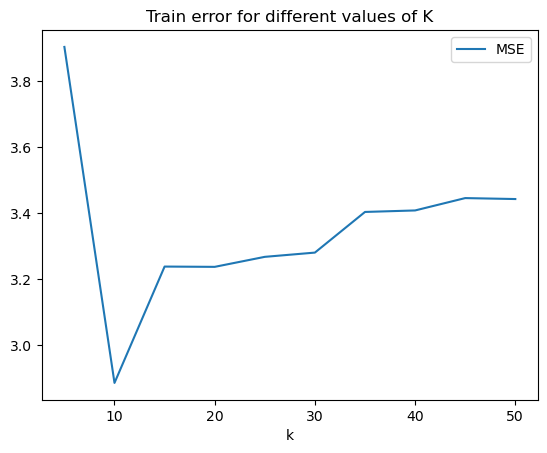

In [18]:
results_df.plot(x='k',y='MSE', title='Train error for different values of K')

In [19]:
import math
results['log_alpha']=results['alpha'].apply(math.log10)

<Axes: title={'center': 'Train error for different values of alpha'}, xlabel='log_alpha'>

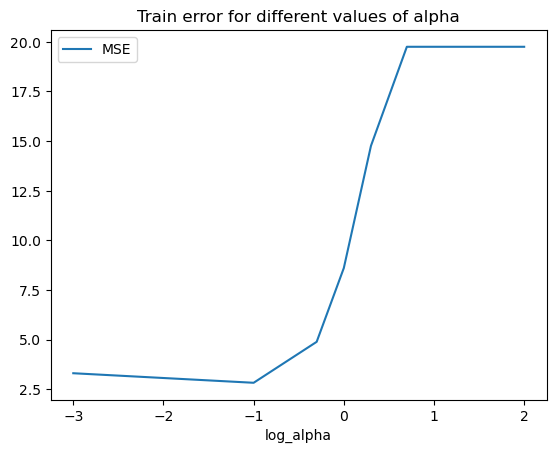

In [20]:
results.plot(x='log_alpha',y='MSE', title='Train error for different values of alpha')

In [21]:
results_df['MSE'].min(axis=0)

2.8857666319530133

In [22]:
df_errors=pd.DataFrame({'MIQP Train Error': [results_df['MSE'].min(axis=0)], 'MIQP Test Error': [mse_final],'Lasso Train Error':[results['MSE'].min(axis=0)],'Lasso Test Error':[mse]})

<Axes: >

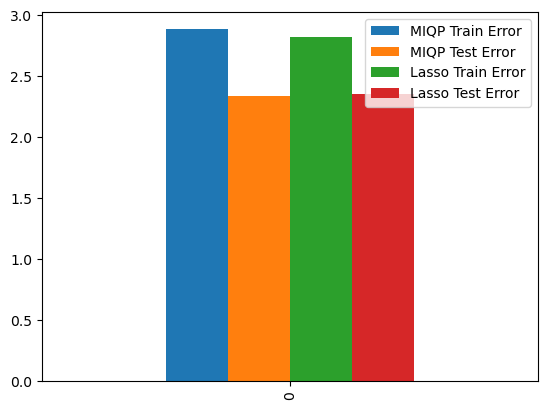

In [23]:
df_errors.plot(kind='bar')

**Comparison of Ceofficients obtained from both models**

In [24]:
coeff=pd.DataFrame({'MIQP Coefficients':w.x[1:],'Lasso Coefficients':lasso.coef_})

<Axes: title={'center': 'Comparison of Ceofficients obtained from both models'}>

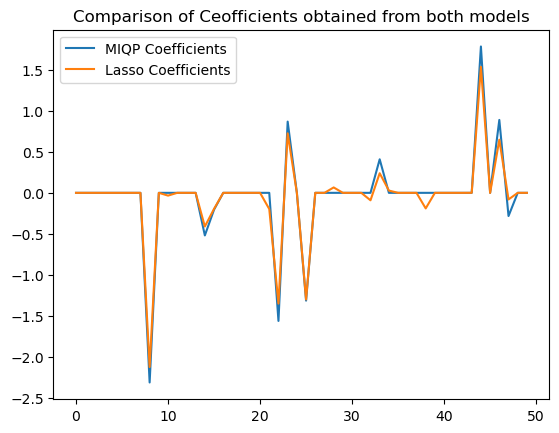

In [25]:
coeff.plot(title='Comparison of Ceofficients obtained from both models')

<Axes: >

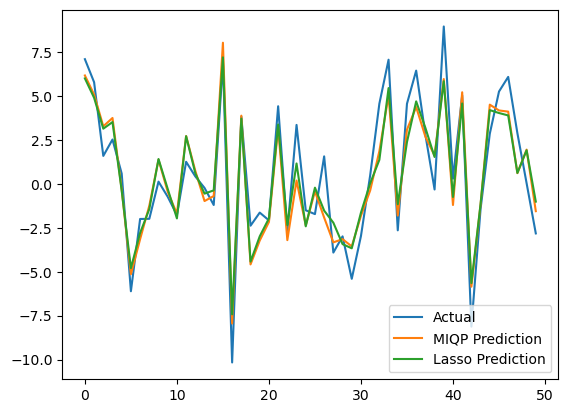

In [26]:
output=pd.DataFrame({'Actual':ytest,'MIQP Prediction':y_pred,'Lasso Prediction':y_predl})
output.plot()

<Axes: >

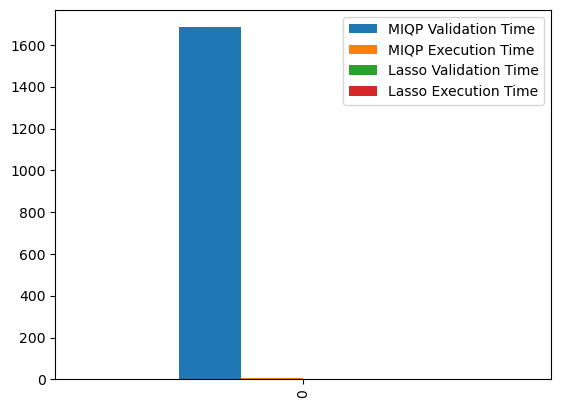

In [27]:
df_time=pd.DataFrame({'MIQP Validation Time': [time1], 'MIQP Execution Time': [time2],'Lasso Validation Time':[time3],'Lasso Execution Time':[time4]})
df_time.plot(kind='bar')

In [28]:
df_time

,MIQP Validation Time,MIQP Execution Time,Lasso Validation Time,Lasso Execution Time
0,1683.732141,4.601364,0.260333,0.002516


LASSO imposes a penalty on the L1 norm of the coefficients, which may result in significant variables' coefficients reducing to zero.

LASSO is computationally efficient and thus, is helpful in scenarios with a large number of predictor variables. At the same time, LASSO may not always yield the optimal solution

In the case of Direct Variable Selection, the optimal number of variables (K) is determined using cross-validation. This yields the optimal solution if all the possible subsets of variables are tested. But, this method is also computationally slower.

Now in cases, where we have a small number of predictor variables and a low error tolerance, direct variable selection is preferred. On the other hand, LASSO is suitable when dealing with a large number of potential predictor variables or limited computational resources.

**Recommendations:**

MIQP has the advantage of how many variables we want to include, where as lasso doesn't.

MIQP is very slow than lasso, and offers very little improvement in accuracy. But it achieves that accuracy with a smaller number of variables|

Lasso is also pretty old therefore it is standard at this point, therefore it is much easy and fast to implement it than MIQP. It ran for couple of seconds while the Varaible Selection method ran for hours.

Again, we also see that the difference in the Test MSE in both the cases are comparable.

Taking both of these factors into account, ***LASSO should be recommended***